In [ ]:
import tensorflow as tf
from tensorflow.keras import models, datasets, layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:5]

(array([6, 9, 9, 4, 1], dtype=uint8), (50000,))

In [ ]:
y_train = y_train.reshape(-1,)#converting 2d array to 1d array, -1 means no change in the 10000 part
y_train, y_train.shape

(array([6, 9, 9, ..., 9, 1, 1], dtype=uint8), (50000,))

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

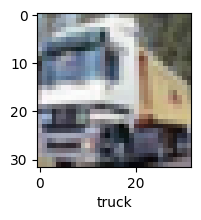

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_test = X_test/255.0
X_train = X_train/255.0

In [ ]:
cnn = models.Sequential([
    #cnn layer 1
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #cnn layers 2
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    #dense
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(10, activation= 'softmax')
])

In [ ]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5082 - accuracy: 0.4589
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1398 - accuracy: 0.5998
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0030 - accuracy: 0.6500
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9154 - accuracy: 0.6840
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8496 - accuracy: 0.7060
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7951 - accuracy: 0.7255
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7495 - accuracy: 0.7411
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7039 - accuracy: 0.7557
Epoch 9/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.6668 - accuracy: 0.7684
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[6.9576857e-04, 1.5075562e-04, 3.8475179e-04, 9.6761608e-01,
        7.6396827e-05, 2.9524008e-02, 8.4605487e-04, 1.5607888e-04,
        5.3860049e-04, 1.1617666e-05],
       [2.8824855e-03, 9.2181146e-01, 1.2259093e-07, 1.1235836e-06,
        1.1513666e-08, 5.3538720e-09, 8.3061700e-09, 2.3240143e-09,
        7.4312210e-02, 9.9265529e-04],
       [3.5517022e-02, 1.4136955e-01, 3.3324689e-03, 6.5686982e-03,
        1.1257004e-03, 1.6955790e-04, 1.6822154e-04, 1.6436778e-04,
        7.2548658e-01, 8.6097874e-02],
       [9.8234951e-01, 1.8458847e-03, 1.2158210e-02, 2.6916183e-04,
        4.8114678e-05, 1.2393067e-05, 3.8208844e-05, 1.7538259e-06,
        3.2731853e-03, 3.5451915e-06],
       [1.1511833e-06, 9.8272103e-05, 7.4887290e-03, 1.8443471e-02,
        7.6868653e-02, 1.0361915e-03, 8.9589381e-01, 5.9338167e-06,
        1.4981435e-04, 1.3959353e-05]], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

3

In [ ]:
y_classes = [np.argmax(ele) for ele in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

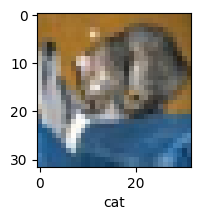

In [ ]:
plot_sample(X_test, y_test, 0)

In [ ]:
classes[y_classes[0]]

'cat'

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71      1000
           1       0.76      0.85      0.80      1000
           2       0.63      0.57      0.60      1000
           3       0.48      0.58      0.52      1000
           4       0.68      0.55      0.61      1000
           5       0.69      0.56      0.62      1000
           6       0.76      0.76      0.76      1000
           7       0.77      0.73      0.75      1000
           8       0.86      0.75      0.80      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

